In [1]:
from conx.widgets import plot
from IPython.display import SVG, Image, HTML

Using Theano backend.


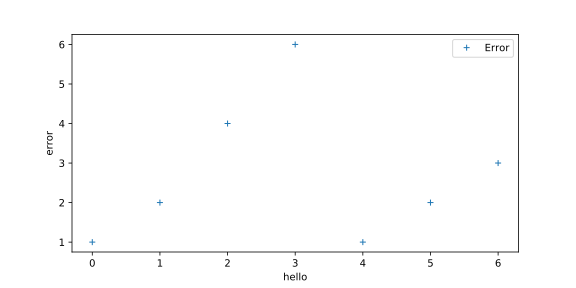

In [2]:
SVG(plot([["Error", "+", [1, 2, 4, 6, 1, 2, 3]]], ylabel="error", xlabel="hello"))